<a href="https://colab.research.google.com/github/superbunny38/2021DataScience/blob/main/corona2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode

In [15]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson'
serviceKey = 'UIZ4nR8Yx%2FM2qRLipwYmfJVi%2B6Fl8uCyx4gSk7S07xo1oOkiRf3hHp8xiiBljk2z6YDG5Kxrq3gCnA3jVWZJ4Q%3D%3D'
decodekey = 'UIZ4nR8Yx/M2qRLipwYmfJVi+6Fl8uCyx4gSk7S07xo1oOkiRf3hHp8xiiBljk2z6YDG5Kxrq3gCnA3jVWZJ4Q=='

In [16]:
import requests
from bs4 import BeautifulSoup as bs
import lxml
from urllib import parse
startCreateDt = 2019414
endCreateDt = 20210709
params = {'ServiceKey':parse.unquote(serviceKey), # 서비스키(필수)
          'startCreateDt':startCreateDt, # 데이터 생성일 시작범위(선택)
          'endCreateDt':endCreateDt # 데이터 생성일 종료범위(선택)
}
res = requests.get(url, params=params)
soup = bs(res.text, "lxml")
#soup = BeautifulSoup(res, "lxml")

'''
query_params = '?' + urlencode({
    quote_plus('serviceKey'): decodekey,
    quote_plus('startCreateDt'): startCreateDt,
    quote_plus('endCreateDt'): endCreateDt
})

URL = url + query_params'''

"\nquery_params = '?' + urlencode({\n    quote_plus('serviceKey'): decodekey,\n    quote_plus('startCreateDt'): startCreateDt,\n    quote_plus('endCreateDt'): endCreateDt\n})\n\nURL = url + query_params"

In [17]:
items = soup.find_all('item')

In [19]:
response = {
            'confCase': '확진자',
            'confCaseRate': '확진률',
            'createDt': '등록일시분초',
            'criticalRate': '치명률',
            'death': '사망자',
            'deathRate': '사망률',
            'gubun': '구분',
            'seq': '고유값',
            'updateDt': '수정일시분초'
            }

In [20]:
# xml을 dictionary로 바꿔 리스트 원소로 추가
lst = []
for y in items:
    l = {}
    for x in y:
        l[x.name] = x.text
    lst.append(l)
lst[:2]

[{'confcase': '7487',
  'confcaserate': '4.56',
  'createdt': '2021-07-08 14:44:56.8',
  'criticalrate': '0',
  'death': '0',
  'deathrate': '0.00',
  'gubun': '0-9',
  'seq': '10057',
  'updatedt': 'null'},
 {'confcase': '12060',
  'confcaserate': '7.35',
  'createdt': '2021-07-08 14:44:56.8',
  'criticalrate': '0',
  'death': '0',
  'deathrate': '0.00',
  'gubun': '10-19',
  'seq': '10056',
  'updatedt': 'null'}]

In [32]:
df = pd.DataFrame(lst)
#print(response.keys())
#df.columns = df.columns.map(response.keys())
df.columns = list(response.values())
#print(df.columns)
df.head()

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,고유값,수정일시분초
0,7487,4.56,2021-07-08 14:44:56.8,0,0,0.00,0-9,10057,null
1,12060,7.35,2021-07-08 14:44:56.8,0,0,0.00,10-19,10056,null
2,25916,15.8,2021-07-08 14:44:56.8,0.01,3,0.15,20-29,10055,null
3,23287,14.2,2021-07-08 14:44:56.8,0.03,8,0.39,30-39,10054,null
4,25549,15.58,2021-07-08 14:44:56.8,0.06,15,0.74,40-49,10053,null


In [34]:
df.head(15)

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,고유값,수정일시분초
0,7487,4.56,2021-07-08 14:44:56.8,0,0,0.00,0-9,10057,null
1,12060,7.35,2021-07-08 14:44:56.8,0,0,0.00,10-19,10056,null
2,25916,15.8,2021-07-08 14:44:56.8,0.01,3,0.15,20-29,10055,null
3,23287,14.2,2021-07-08 14:44:56.8,0.03,8,0.39,30-39,10054,null
4,25549,15.58,2021-07-08 14:44:56.8,0.06,15,0.74,40-49,10053,null
5,29901,18.23,2021-07-08 14:44:56.8,0.24,73,3.59,50-59,10052,null
6,23470,14.31,2021-07-08 14:44:56.8,1.04,245,12.05,60-69,10051,null
7,10422,6.35,2021-07-08 14:44:56.799,5.59,583,28.66,70-79,10050,null
8,5936,3.62,2021-07-08 14:44:56.799,18.65,1107,54.42,80 이상,10049,null
9,81168,49.48,2021-07-08 14:44:56.799,1.27,1028,50.54,여성,10048,null


In [38]:
now = df[:11]

In [41]:
female_now = now[now["구분"]=="여성"]
female_now

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,고유값,수정일시분초
9,81168,49.48,2021-07-08 14:44:56.799,1.27,1028,50.54,여성,10048,null


In [42]:
male_now = now[now["구분"]=="남성"]
male_now

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,고유값,수정일시분초
10,82860,50.52,2021-07-08 14:44:56.799,1.21,1006,49.46,남성,10047,null


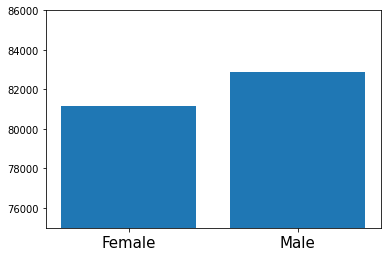

In [71]:
#여성 남성 수 비교
import matplotlib.pyplot as plt
import numpy as np


label = ["Female","Male"]
index = np.arange(len(label))
y = [int(female_now["확진자"]),int(male_now["확진자"])]
plt.ylim(75000,86000)
plt.bar(index,y)
plt.xticks(index, label, fontsize=15)
plt.show()

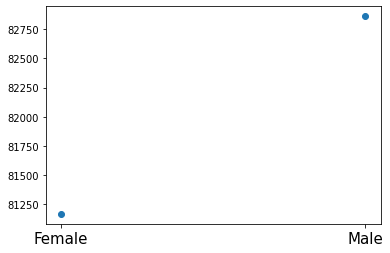

In [64]:
#여성 남성 수 비교
import matplotlib.pyplot as plt
import numpy as np


label = ["Female","Male"]
index = np.arange(len(label))
y = [int(female_now["확진자"]),int(male_now["확진자"])]
plt.scatter(index,y)
plt.xticks(index, label, fontsize=15)
plt.show()

In [58]:
#연령
import matplotlib.pyplot as plt
import numpy as np

age_now = now[:9]
label = [x for x in age_now["구분"]]
label[8] = 'over 80'

In [59]:
index = np.arange(len(label))
y = [int(x) for x in age_now["확진자"]]
print(index)
print(y)

[0 1 2 3 4 5 6 7 8]
[7487, 12060, 25916, 23287, 25549, 29901, 23470, 10422, 5936]


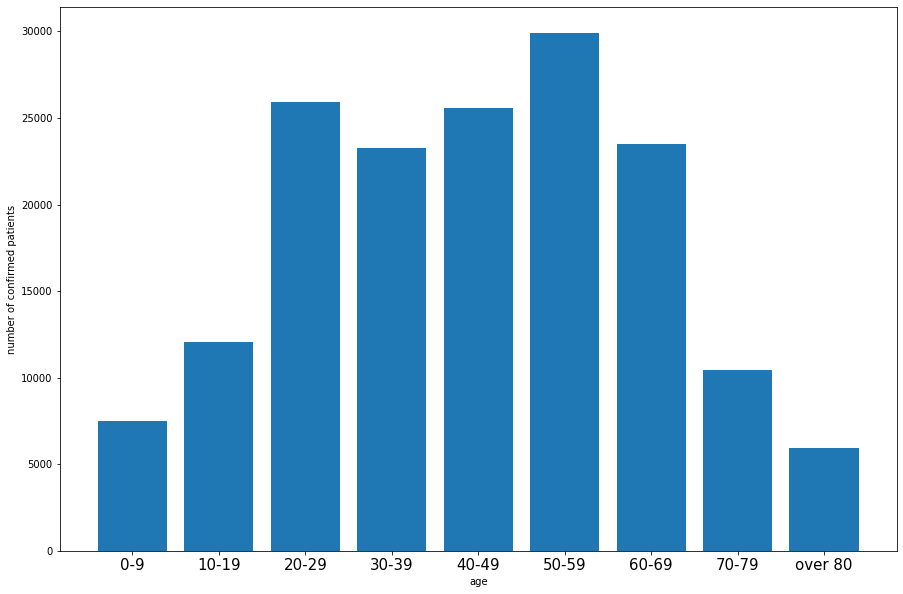

In [62]:
plt.figure(figsize=(15, 10))
plt.bar(index,y)
plt.xticks(index, label, fontsize=15)
plt.xlabel("age")
plt.ylabel("number of confirmed patients")
plt.show()